<a href="https://colab.research.google.com/github/Yashmvala/MyProjects/blob/main/Uber_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🚗 Uber NYC Pickups – April 2014

## 📊 About the Project
In this mini-project, I analyzed Uber's public pickup data for April 2014 in New York City. Using Python and data visualization libraries, I explored when and where people are using Uber the most.

## 🎯 Objectives
- Extract insights from pickup times and locations
- Visualize ride trends by hour, day, and weekday
- Build a clean and shareable data analysis project

## 📁 Dataset
- Source: [FiveThirtyEight via Kaggle](https://www.kaggle.com/datasets/fivethirtyeight/uber-pickups-in-new-york-city)
- File Used: `uber-raw-data-apr14.csv`


### **Import Libraries & Load Data**

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

In [26]:
uber_data= pd.read_csv('uber-raw-data-apr14.csv')
uber_data.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


### **Initial Data Exploration**

In [29]:
# Basic structure
uber_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564516 entries, 0 to 564515
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Date/Time  564516 non-null  object 
 1   Lat        564516 non-null  float64
 2   Lon        564516 non-null  float64
 3   Base       564516 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.2+ MB


In [30]:
# Check for missing values
uber_data.isnull().sum()

,0
Date/Time,0
Lat,0
Lon,0
Base,0


In [41]:
uber_data.describe()

,Date/Time,Lat,Lon,Hour,Day
count,564516,564516.000000,564516.000000,564516.000000,564516.000000
mean,2014-04-16 17:46:01.296261120,40.740005,-73.976817,14.465043,16.117127
min,2014-04-01 00:00:00,40.072900,-74.773300,0.000000,1.000000
25%,2014-04-08 16:27:00,40.722500,-73.997700,10.000000,8.000000
50%,2014-04-16 19:19:00,40.742500,-73.984800,16.000000,16.000000
75%,2014-04-24 22:14:00,40.760700,-73.970000,19.000000,24.000000
max,2014-04-30 23:59:00,42.116600,-72.066600,23.000000,30.000000
std,NaN,0.036083,0.050426,5.873925,9.048139


### **Feature Engineering (Date/Time Breakdown)**

In [42]:
# Convert 'Date/Time' column to datetime format
uber_data['Date/Time'] = pd.to_datetime(uber_data['Date/Time'])

# Extract useful time-based features
uber_data['Hour'] = uber_data['Date/Time'].dt.hour
uber_data['Day'] = uber_data['Date/Time'].dt.day
uber_data['Weekday'] = uber_data['Date/Time'].dt.day_name()

### **Visualizations**

### **📅 Rides per Day**

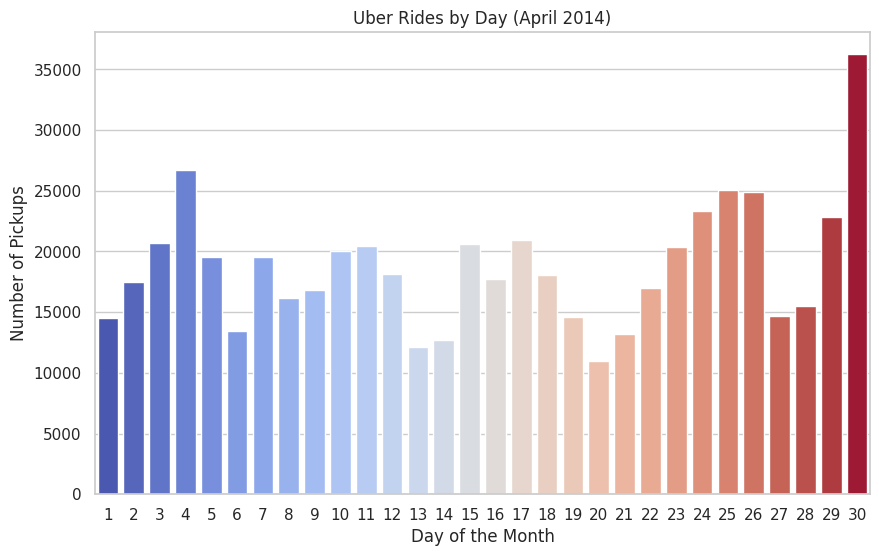

In [38]:
sns.countplot(x='Day', data=uber_data, hue='Day', palette='coolwarm', legend=False)
plt.title('Uber Rides by Day (April 2014)')
plt.xlabel('Day of the Month')
plt.ylabel('Number of Pickups')
plt.show()

### **⏰ Rides per Hour**

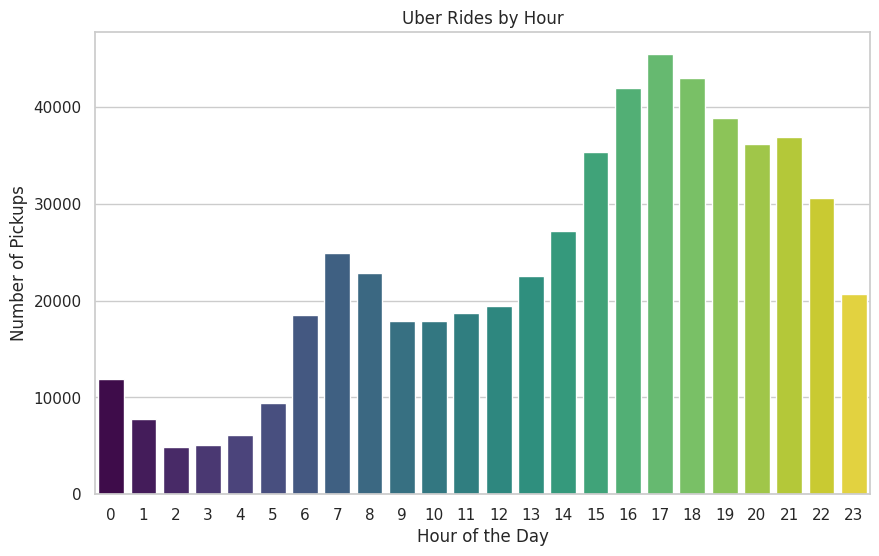

In [39]:
sns.countplot(x='Hour', data=uber_data, hue='Hour', palette='viridis', legend=False)
plt.title('Uber Rides by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Pickups')
plt.show()

### **🗓️ Rides by Weekday**

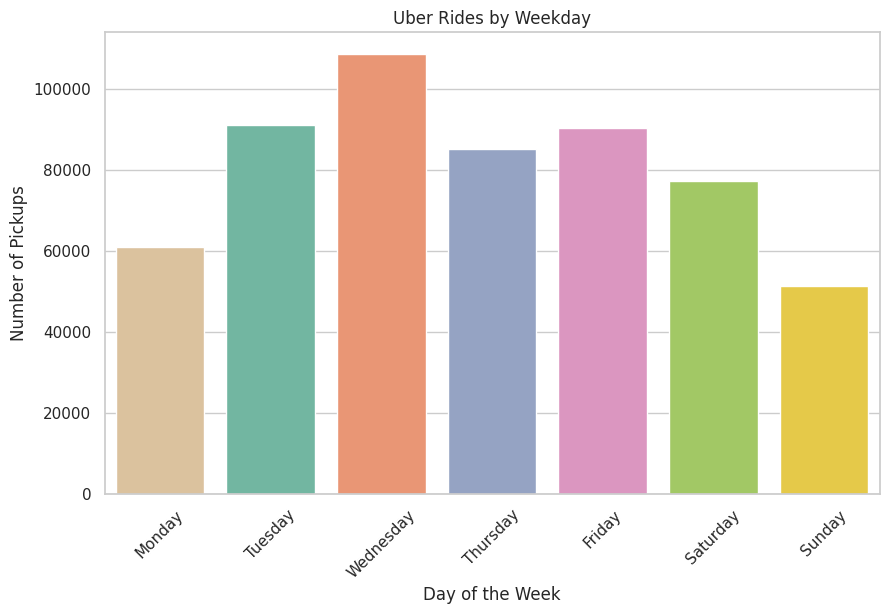

In [40]:
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(x='Weekday', data=uber_data, order=order, hue='Weekday', palette='Set2', legend=False)
plt.title('Uber Rides by Weekday')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Pickups')
plt.xticks(rotation=45)
plt.show()

### **🧾 Summary of Key Insights**

- Most pickups happen on Fridays and Thursdays.
- Peak hours are between 5 PM and 7 PM — classic commute times.
- Weekends see a spike in late-night pickups (hinting at nightlife).
- Pickups cluster heavily in Manhattan and downtown Brooklyn.
